# Лабораторная работа №5

## Импорт библиотек

In [1]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import (AdaBoostClassifier, AdaBoostRegressor,
                              BaggingClassifier, BaggingRegressor,
                              RandomForestClassifier, RandomForestRegressor,
                              StackingClassifier, StackingRegressor)
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Lars
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from funcs import Ensemble, Stacking, plot_scores_compare, prepare_data

## Загрузка и обработка данных

In [2]:
lab2_sample_len = 1500
lab2_df = pd.read_csv("Data/train2.csv")
lab2_df = lab2_df.sample(n=lab2_sample_len, replace=False, random_state=42)
lab3_df = pd.read_csv("Data/train3.csv")

x_c, y_c, x_r, y_r = prepare_data(lab2_df, lab3_df)
x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x_c, y_c,
                                                                    test_size=0.3,
                                                                    random_state=42)
xy_train_clf, xy_test_clf = (x_train_clf, y_train_clf), (x_test_clf, y_test_clf)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_r, y_r,
                                                                    test_size=0.3,
                                                                    random_state=42)
xy_train_reg, xy_test_reg = (x_train_reg, y_train_reg), (x_test_reg, y_test_reg)

## Классификация

In [3]:
clf_to_ensemble = [LogisticRegression, DecisionTreeClassifier, GaussianNB]

### Бэггинг

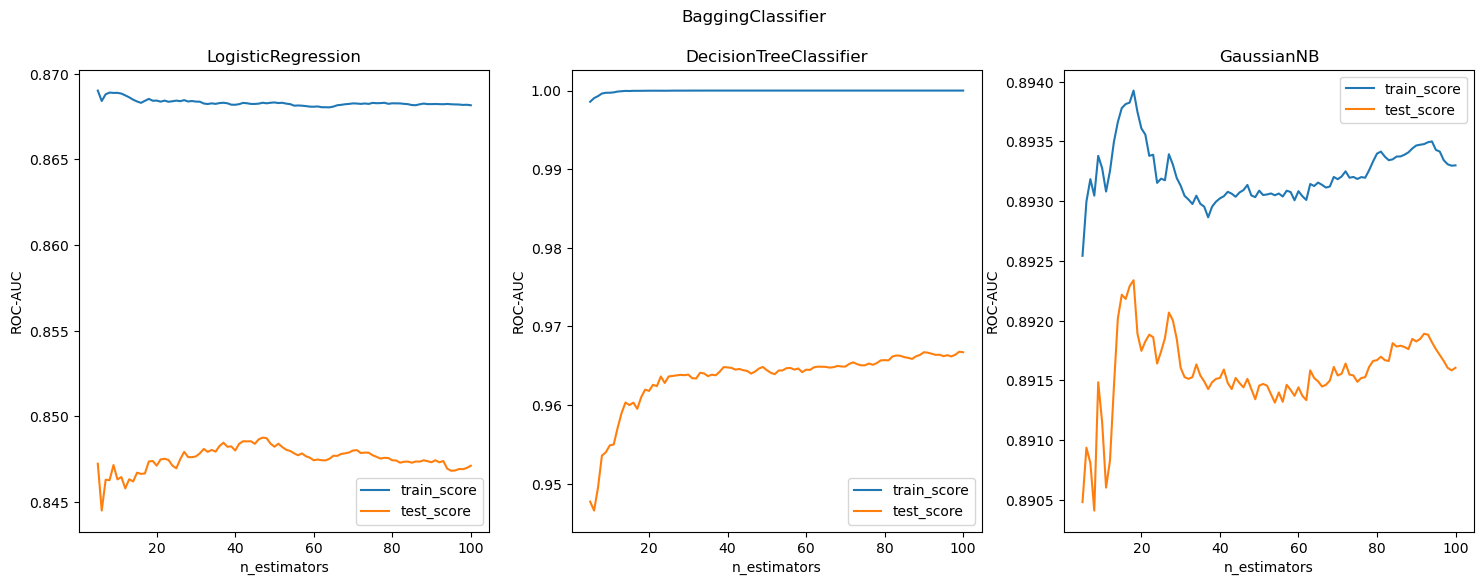

Лучшая модель: DecisionTreeClassifier
Лучшее значение n_estimators: 99
ROC-AUC: 0.9667897203906421


In [4]:
bagging_clf = Ensemble(BaggingClassifier, clf_to_ensemble,
                       xy_train_clf, xy_test_clf,
                       range(5, 101))

bagging_clf.params_count_compare()

## Бустинг

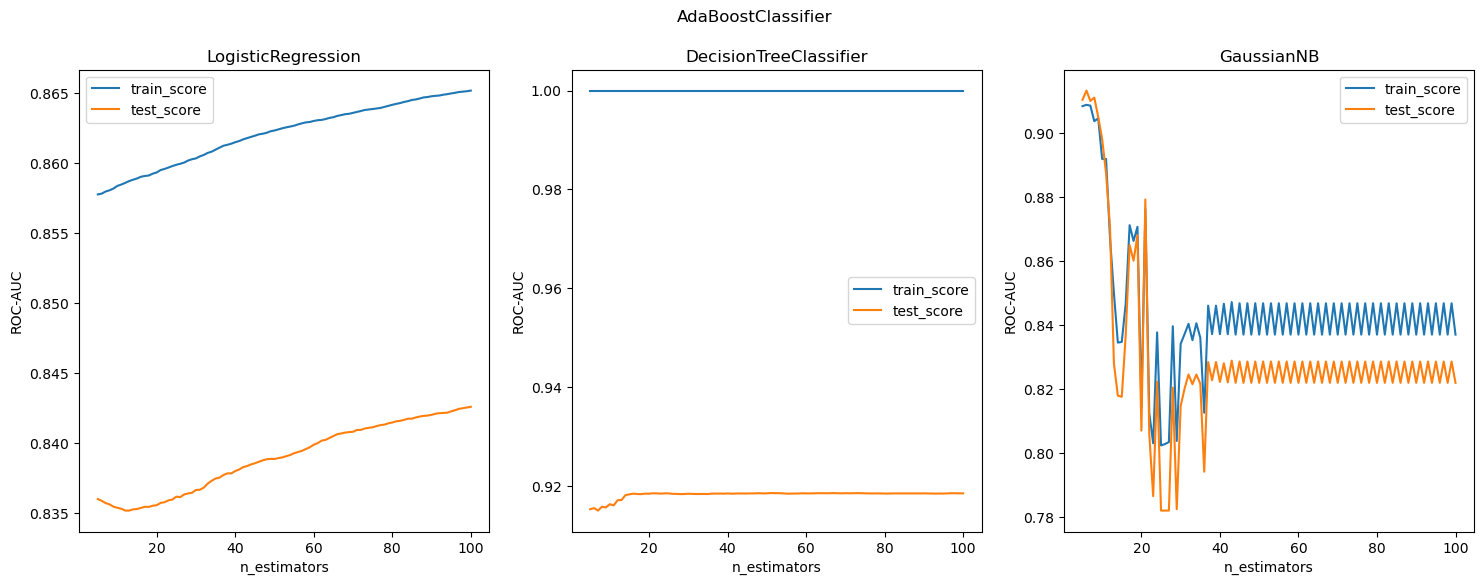

Лучшая модель: DecisionTreeClassifier
Лучшее значение n_estimators: 51
ROC-AUC: 0.9185853800795226


In [5]:
ada_boost_clf = Ensemble(AdaBoostClassifier, clf_to_ensemble,
                         xy_train_clf, xy_test_clf,
                         range(5, 101))
ada_boost_clf.params_count_compare()

### Stacking

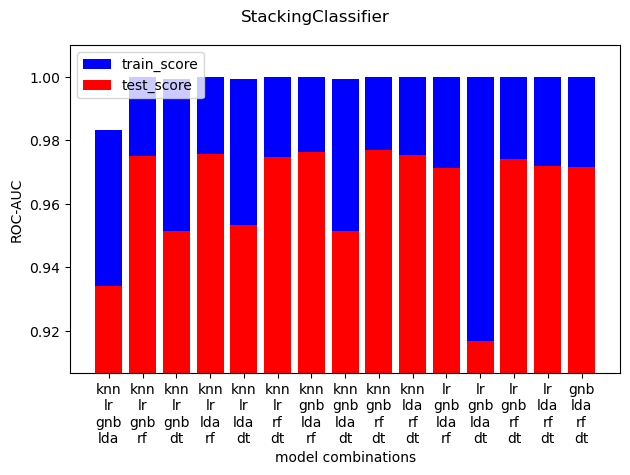

Лучшая комбинация: knn gnb rf dt
ROC-AUC: 0.976925648521577


In [6]:
estimators_clf = [
    ('knn', KNeighborsClassifier),
    ('lr', LogisticRegression),
    ('gnb', GaussianNB),
    ('lda', LinearDiscriminantAnalysis),
    ('rf', RandomForestClassifier),
    ('dt', DecisionTreeClassifier)
]

stacking_clf = Stacking(StackingClassifier, estimators_clf, xy_train_clf,
                        xy_test_clf, n_samples="all", sample_len=4)

stacking_clf.find_best_combination()

## Регрессия

In [7]:
reg_to_ensemble = [DecisionTreeRegressor, Lasso, LinearRegression]

### Bagging

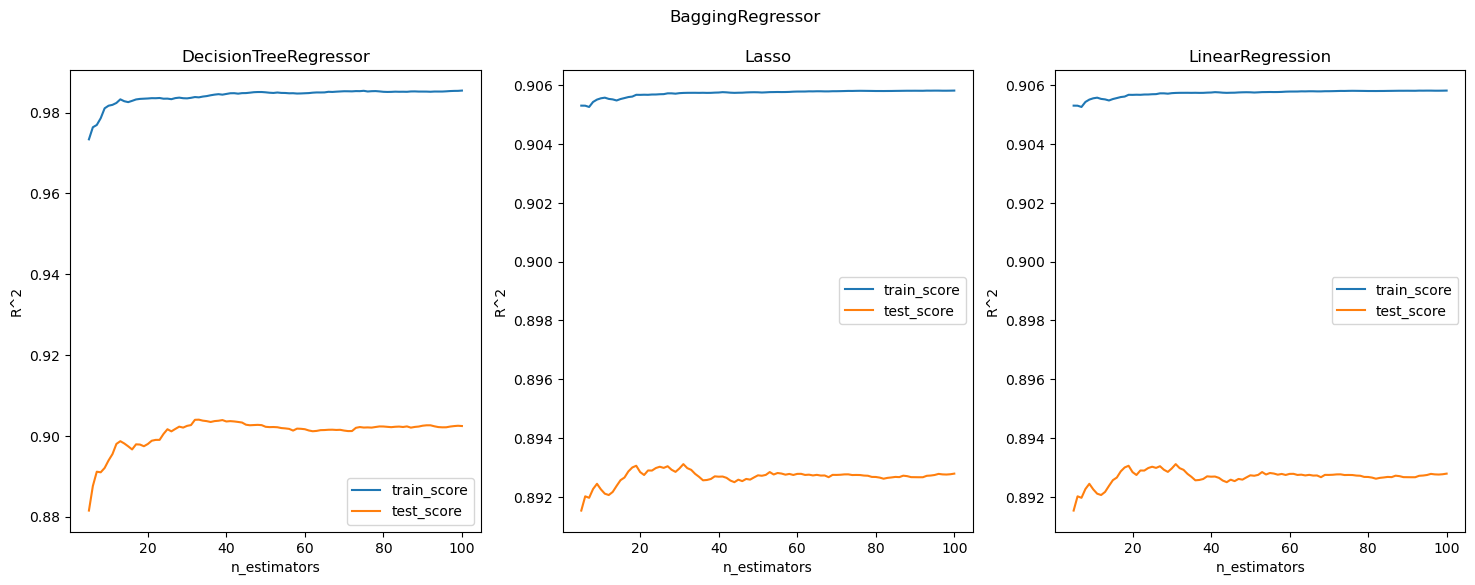

Лучшая модель: Lasso
Лучшее значение n_estimators: 31
R^2: 0.8931065181072063


In [8]:
bagging_reg = Ensemble(BaggingRegressor, reg_to_ensemble,
                       xy_train_reg, xy_test_reg,
                       range(5, 101))
bagging_reg.params_count_compare()

### Boosting

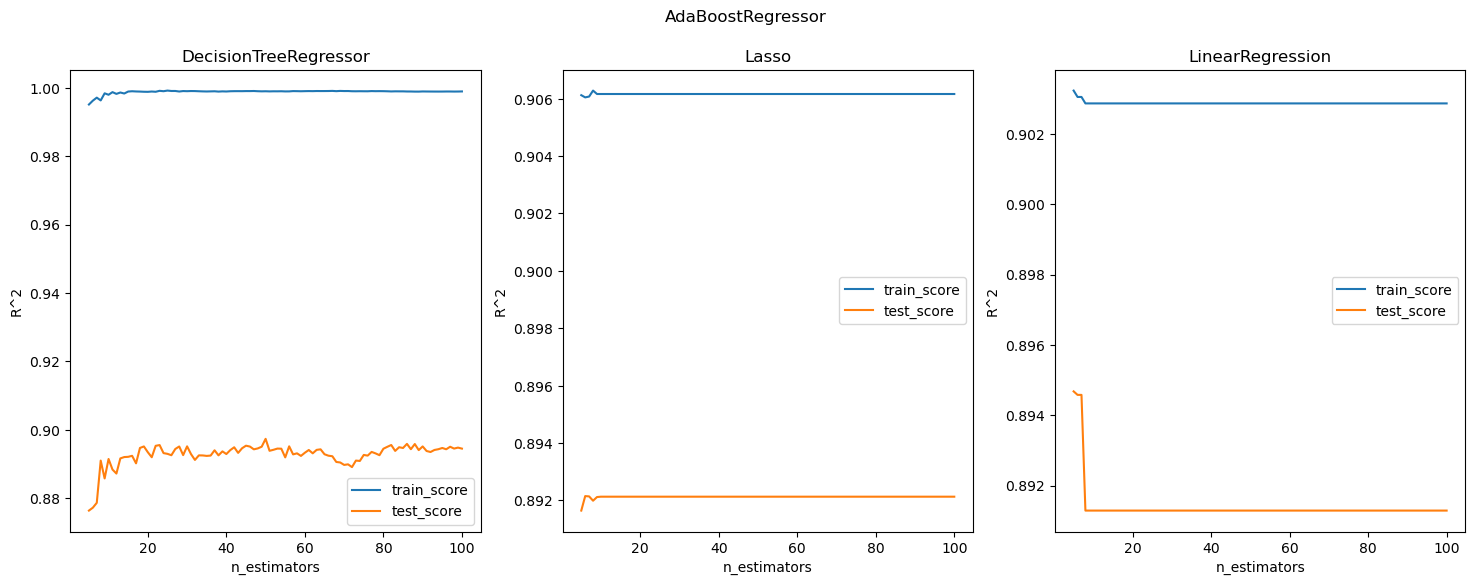

Лучшая модель: LinearRegression
Лучшее значение n_estimators: 5
R^2: 0.8946777042294424


In [9]:
ada_boost_reg = Ensemble(AdaBoostRegressor, reg_to_ensemble,
                         xy_train_reg, xy_test_reg,
                         range(5, 101))
ada_boost_reg.params_count_compare()

### Stacking

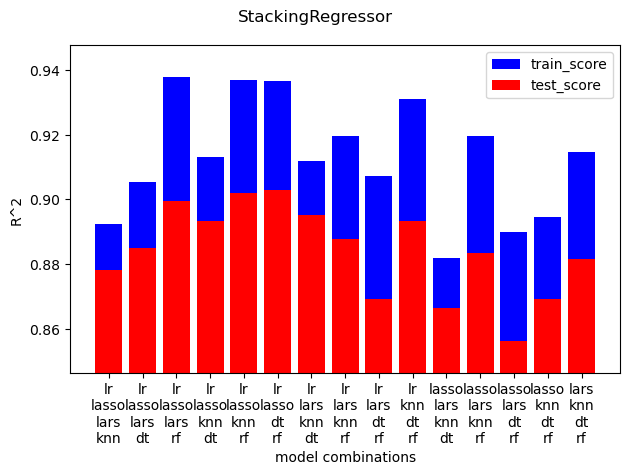

Лучшая комбинация: lr lasso dt rf
R^2: 0.9028887480075373


In [10]:
estimators_reg = [
    ('lr', LinearRegression),
    ('lasso', Lasso),
    ('lars', Lars),
    ('knn', KNeighborsRegressor),
    ('dt', DecisionTreeRegressor),
    ('rf', RandomForestRegressor)
]

stacking_reg = Stacking(StackingRegressor, estimators_reg, xy_train_reg, xy_test_reg,
                        n_samples="all", sample_len=4)

stacking_reg.find_best_combination()

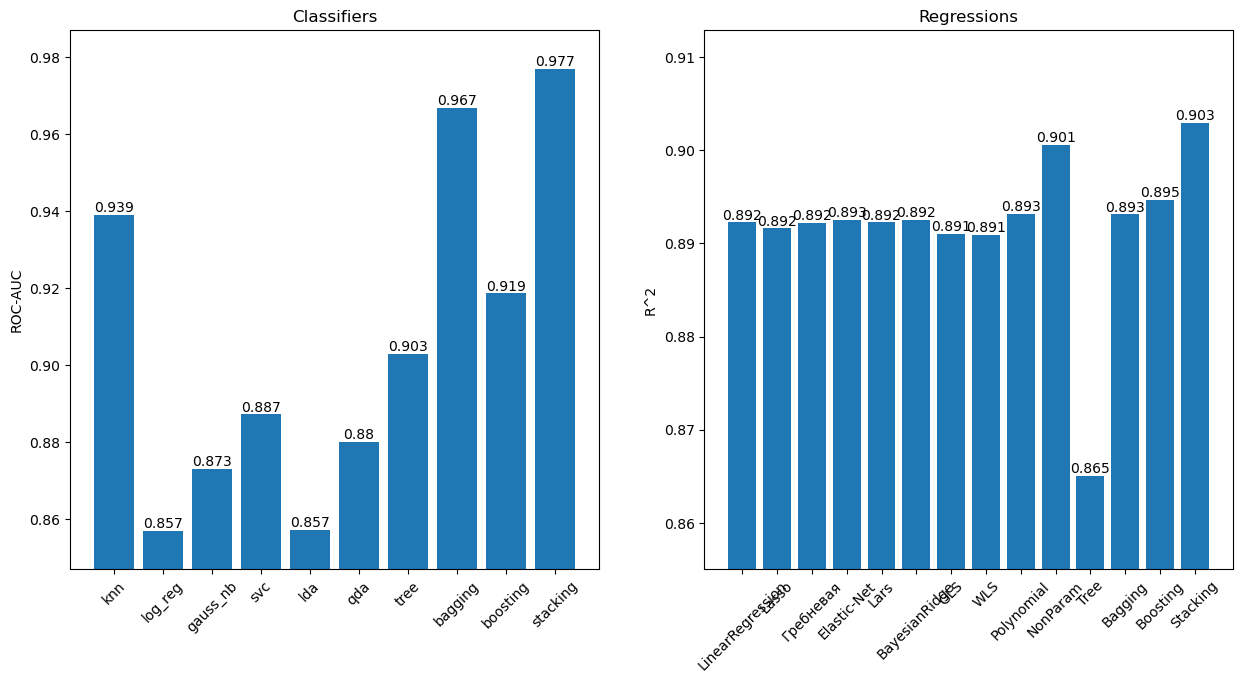

In [11]:
clf_scores = pd.read_csv("Data/scores_clf.csv", sep=",")
reg_scores = pd.read_csv("Data/scores_reg.csv", sep=",")
clfs = {
    "bagging": bagging_clf.best_score,
    "boosting": ada_boost_clf.best_score,
    "stacking": stacking_clf.best_score
}
regs = {
    "Bagging": bagging_reg.best_score,
    "Boosting": ada_boost_reg.best_score,
    "Stacking": stacking_reg.best_score
}
for (c_name, c_score), (r_name, r_score) in zip(clfs.items(), regs.items()):
    clf_scores = clf_scores.append({"Model name": c_name, "ROC-AUC": c_score}, ignore_index=True)
    reg_scores = reg_scores.append({"Model name": r_name, "R^2": r_score}, ignore_index=True)

plot_scores_compare(clf_scores, reg_scores)